In [4]:
!pip install wordcloud
!pip install imblearn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install statsmodels
!pip install yellowbrick


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics #scaling
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasi kata
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler #skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight") 

import statsmodels
import statsmodels.api as sm

In [7]:
data = pd.read_csv('datatugas.csv')

In [8]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
data.isnull()

,sepal length,sepal width,petal length,petal width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [15]:
data.describe

<bound method NDFrame.describe of      sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [65]:
data.drop(columns = 'class')


,sepal length,sepal width,petal length,petal width,Hasil_Cluster
0,5.1,3.5,4,0.2,0
1,4.9,3.0,4,0.2,0
2,4.7,3.2,3,0.2,0
3,4.6,3.1,5,0.2,0
4,5.0,3.6,4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,28,2.3,1
146,6.3,2.5,26,1.9,1
147,6.5,3.0,28,2.0,1
148,6.2,3.4,30,2.3,1


In [66]:
data.describe

<bound method NDFrame.describe of      sepal length  sepal width  petal length  petal width  class  \
0             5.1          3.5             4          0.2      0   
1             4.9          3.0             4          0.2      0   
2             4.7          3.2             3          0.2      0   
3             4.6          3.1             5          0.2      0   
4             5.0          3.6             4          0.2      0   
..            ...          ...           ...          ...    ...   
145           6.7          3.0            28          2.3      2   
146           6.3          2.5            26          1.9      2   
147           6.5          3.0            28          2.0      2   
148           6.2          3.4            30          2.3      2   
149           5.9          3.0            27          1.8      2   

     Hasil_Cluster  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
14

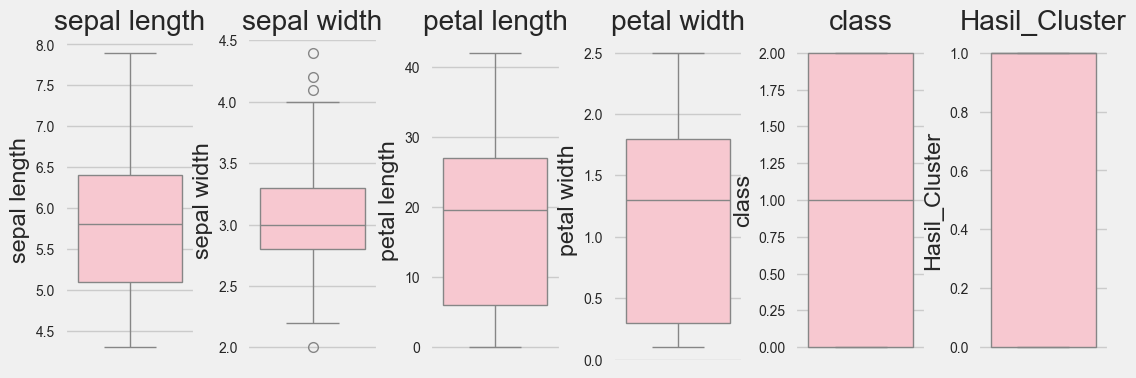

In [84]:
def box_plot(data):
    variables = data.select_dtypes(exclude = 'object').columns
    #buat figure dan axes untuk subplot dengan ukuran 1x3
    fig,axes = plt.subplots(1, ncols=len(variables), figsize=(12, 4)) #sesuaikan ukuran figure
    fig.subplots_adjust(hspace=0.4, wspace=0.4) #atur jarak subplot
    #iterasi melalui variable dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="pink", ax=axes[i]) #perhatikan perubahan disini
        axes[i].set_title(var) #tambahkan judul untuk setiap plot
        
    plt.show()
    
box_plot(data)
  

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data.head()

,sepal length,sepal width,petal length,petal width,class,Hasil_Cluster
0,5.1,3.5,4,0.2,0,0
1,4.9,3.0,4,0.2,0,0
2,4.7,3.2,3,0.2,0,0
3,4.6,3.1,5,0.2,0,0
4,5.0,3.6,4,0.2,0,0


In [69]:
#instantiate
scaler = MinMaxScaler()

#fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.0952381 , 0.04166667, 0.        ,
        0.        ],
       [0.16666667, 0.41666667, 0.0952381 , 0.04166667, 0.        ,
        0.        ],
       [0.11111111, 0.5       , 0.07142857, 0.04166667, 0.        ,
        0.        ],
       [0.08333333, 0.45833333, 0.11904762, 0.04166667, 0.        ,
        0.        ],
       [0.19444444, 0.66666667, 0.0952381 , 0.04166667, 0.        ,
        0.        ],
       [0.30555556, 0.79166667, 0.16666667, 0.125     , 0.        ,
        0.        ],
       [0.08333333, 0.58333333, 0.0952381 , 0.08333333, 0.        ,
        0.        ],
       [0.19444444, 0.58333333, 0.11904762, 0.04166667, 0.        ,
        0.        ],
       [0.02777778, 0.375     , 0.0952381 , 0.04166667, 0.        ,
        0.        ],
       [0.16666667, 0.45833333, 0.11904762, 0.        , 0.        ,
        0.        ],
       [0.30555556, 0.70833333, 0.11904762, 0.04166667, 0.        ,
        0.        ],
       [0.13888889, 0

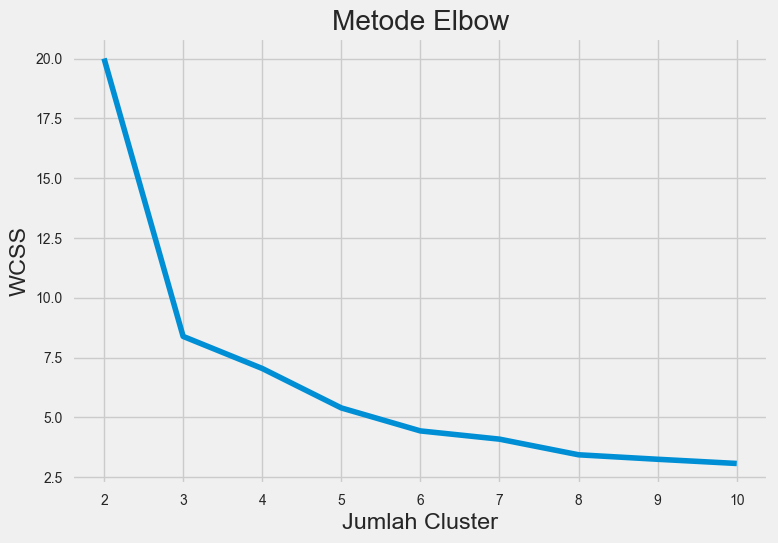

In [70]:
wcss = []

for i in range (2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [71]:
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state= 42)
y_pred1 = model1.fit_predict(X_scaled)

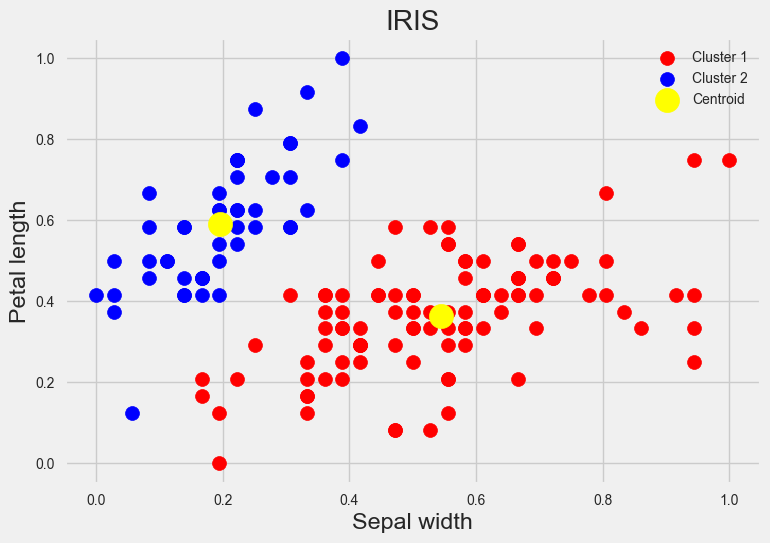

In [72]:
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroid')
plt.title('IRIS')
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.legend()


In [73]:
model2 = DBSCAN(eps = 0.6, min_samples = 10)
model2.fit(X_scaled)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
data['Hasil_Cluster'] = model2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,class,Hasil_Cluster
0,5.1,3.5,4,0.2,0,0
1,4.9,3.0,4,0.2,0,0
2,4.7,3.2,3,0.2,0,0
3,4.6,3.1,5,0.2,0,0
4,5.0,3.6,4,0.2,0,0


<Axes: xlabel='sepal length', ylabel='sepal length'>

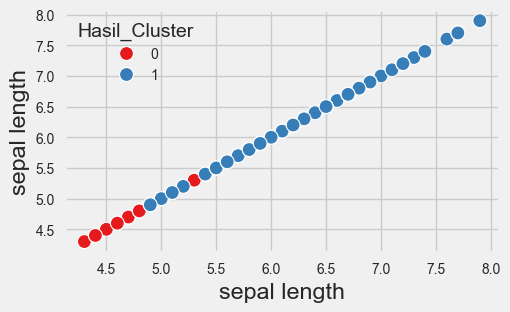

In [75]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='sepal length', y = 'sepal length',
                hue = 'Hasil_Cluster', data = data, palette='Set1', s = 100)


In [76]:
from sklearn.metrics import silhouette_score

Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print('Silhouette Score K-Means:', Evaluasi_KMeans)

Silhouette Score K-Means: 0.7147793381209817


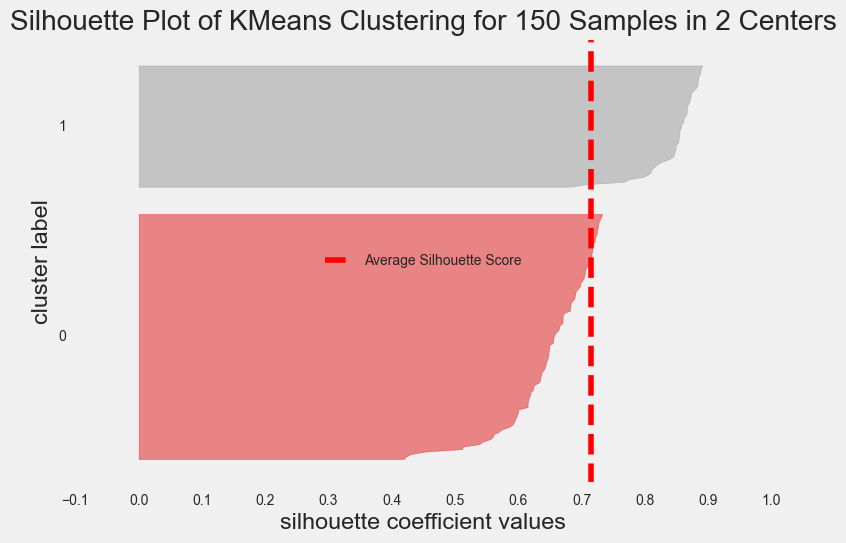

In [79]:
# Membuat Silhouette_score visualization untuk algoritma 
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [50]:
#DBL
# Menghitung DBI algoritma K-Means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print('DBI Score K-Means:', dbi_score1)

DBI Score K-Means: 0.5003413651728945


In [80]:
# Menghitung DBI algoritma K-Means
dbi_score2 = davies_bouldin_score(X_scaled, y_pred1)
print('DBI Score K-Means:', dbi_score2)

DBI Score K-Means: 0.3778918970974158


<Axes: xlabel='petal length', ylabel='sepal length'>

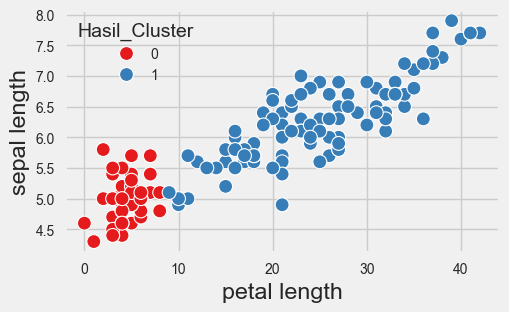

In [82]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='petal length', y = 'sepal length',
                hue = 'Hasil_Cluster', data = data, palette='Set1', s = 100)